In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
dataset = pd.read_excel('superstore_sales.xlsx')
dataset.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [3]:
dataset.shape

(51290, 21)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [5]:
dataset.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [6]:
dataset.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [7]:
dataset[dataset.duplicated()]

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


In [8]:
dataset.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


In [9]:
dataset['year_month'] = dataset['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [10]:
dataset.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


In [11]:
dataset['category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: category, dtype: int64

In [12]:
dataset['sub_category'].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: sub_category, dtype: int64

In [13]:
dataset['segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: segment, dtype: int64

In [14]:
dataset['ship_mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

In [15]:
profit_df = dataset[dataset['profit'] > 0]
profit_df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,Medium,2011,2011-01
5,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.1,15.3420,1.800,Medium,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51284,MX-2014-108574,2014-12-31,2015-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,Labels,"Novimex Legal Exhibit Labels, Adjustable",16.740,3,0.0,0.6600,1.324,Medium,2014,2014-12
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014,2014-12
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014,2014-12
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014,2014-12


In [16]:
total_profit = profit_df['profit'].sum()
print("Total profit : ",total_profit)

Total profit :  2389392.212


In [17]:
category_subcategory_wise_sales_and_profit = profit_df.groupby(["category", "sub_category"])[['sales','profit']].agg('sum')
category_subcategory_wise_sales_and_profit

sales       profit
category        sub_category                           
Furniture       Bookcases     1.163329e+06  263370.7168
                Chairs        1.102566e+06  237769.9294
                Furnishings   3.122562e+05   75481.9224
                Tables        4.093322e+05   80039.7599
Office Supplies Appliances    8.417558e+05  205672.2798
                Art           3.185448e+05   79614.5386
                Binders       3.914699e+05  125333.9073
                Envelopes     1.438776e+05   40464.6818
                Fasteners     6.812137e+04   17798.7240
                Labels        6.338683e+04   18771.2821
                Paper         2.186483e+05   69507.1764
                Storage       8.681493e+05  184525.4678
                Supplies      1.928337e+05   40767.6941
Technology      Accessories   6.414648e+05  169483.8044
                Copiers       1.248927e+06  330115.0480
                Machines      5.769858e+05  137540.6133
                Phones        1.441839e+06  313134.6659

In [18]:
loss_df = dataset[dataset['profit'] < 0]
loss_df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.8650,3,0.50,-26.0550,4.82,High,2011,2011-01
8,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Copiers,"Hewlett Wireless Fax, Laser",912.4560,4,0.40,-319.4640,107.10,Low,2011,2011-01
10,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Storage,"Tenex Lockers, Industrial",337.6395,3,0.45,-122.8005,33.75,High,2011,2011-01
11,IN-2011-65159,2011-01-03,2011-01-07,Second Class,Larry Blacks,Consumer,National Capital,Philippines,APAC,Southeast Asia,...,Tables,"Chromcraft Round Table, Adjustable Height",211.1805,1,0.55,-70.3995,21.32,High,2011,2011-01
14,ID-2011-80230,2011-01-03,2011-01-09,Standard Class,Ken Lonsdale,Consumer,Auckland,New Zealand,APAC,Oceania,...,Chairs,"Hon Rocking Chair, Set of Two",159.4440,2,0.40,-95.6760,10.07,Low,2011,2011-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51267,IT-2014-3715679,2014-12-31,2015-01-05,Second Class,Jim Kriz,Home Office,North Brabant,Netherlands,EU,Central,...,Art,"BIC Pencil Sharpener, Fluorescent",30.2700,2,0.50,-9.6900,4.46,High,2014,2014-12
51272,IT-2014-3715679,2014-12-31,2015-01-05,Second Class,Jim Kriz,Home Office,North Brabant,Netherlands,EU,Central,...,Binders,"Avery Binder Covers, Recycled",22.8600,4,0.50,-6.4200,3.46,High,2014,2014-12
51274,TU-2014-5170,2014-12-31,2015-01-04,Second Class,Valerie Dominguez,Consumer,Konya,Turkey,EMEA,EMEA,...,Accessories,"SanDisk Keyboard, Bluetooth",32.5920,1,0.60,-25.2780,3.40,Medium,2014,2014-12
51275,ID-2014-54442,2014-12-31,2015-01-04,Standard Class,Muhammed Yedwab,Corporate,National Capital,Philippines,APAC,Southeast Asia,...,Accessories,"Memorex Mouse, Bluetooth",61.9740,4,0.45,-37.2660,3.18,Medium,2014,2014-12


In [19]:
total_loss = loss_df['profit'].sum()
print("Total loss : ",total_loss)

Total loss :  -920357.39072


In [20]:
dataset.groupby('customer_name')[['sales','profit']].agg('sum')

,sales,profit
customer_name,,
Aaron Bergman,24644.62750,4683.20800
Aaron Hawkins,20759.51384,2450.92904
Aaron Smayling,14212.62840,369.16180
Adam Bellavance,20186.77840,4979.97690
Adam Hart,21718.20142,1902.03342
...,...,...
Xylona Preis,12198.95060,1304.72260
Yana Sorensen,20032.43800,3450.40630
Yoseph Carroll,20164.37760,4347.17660


In [21]:
dataset.groupby('category')[['sales','profit']].agg('sum')

,sales,profit
category,,
Furniture,4.110874e+06,286782.25380
Office Supplies,3.787070e+06,518473.83430
Technology,4.744557e+06,663778.73318


In [22]:
dataset.groupby('sub_category')[['sales','profit']].agg('sum')

,sales,profit
sub_category,,
Accessories,7.492370e+05,129626.30620
Appliances,1.011064e+06,141680.58940
Art,3.720920e+05,57953.91090
Binders,4.619115e+05,72449.84600
Bookcases,1.466572e+06,161924.41950
Chairs,1.501682e+06,141973.79750
Copiers,1.509436e+06,258567.54818
Envelopes,1.709043e+05,29601.11630
Fasteners,8.324232e+04,11525.42410


In [23]:
dataset.groupby('year')[['sales','profit']].agg('sum')

,sales,profit
year,,
2011,2.259451e+06,248940.81154
2012,2.677439e+06,307415.27910
2013,3.405746e+06,408512.76018
2014,4.299866e+06,504165.97046


In [24]:
sales_by_year_month = dataset.groupby('year_month')[['sales','profit']].agg('sum')
sales_by_year_month

,sales,profit
year_month,,
2011-01,98898.48886,8321.80096
2011-02,91152.15698,12417.90698
2011-03,145729.36736,15303.56826
2011-04,116915.76418,12902.32438
2011-05,146747.83610,12183.82870
2011-06,215207.38022,23415.24702
2011-07,115510.41912,5585.00352
2011-08,207581.49122,23713.66772
2011-09,290214.45534,35776.88394


In [25]:
df_2011 = dataset.loc[dataset['year'] == 2011]
df_2011_monthly_sales = df_2011.groupby('year_month')['sales'].sum().reset_index()
df_2011_monthly_sales

,year_month,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


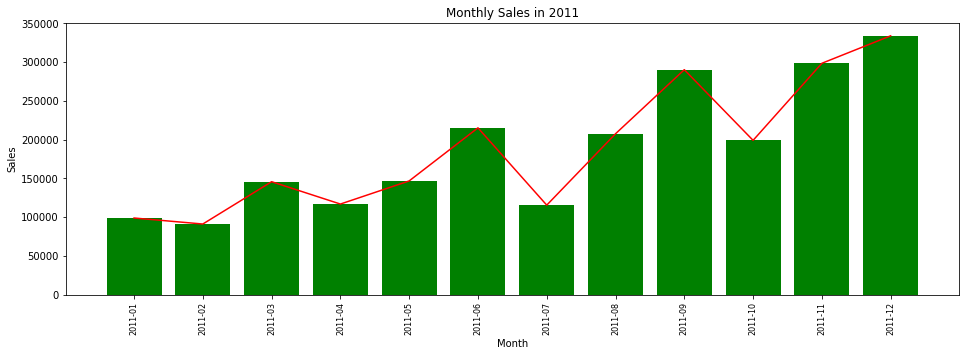

In [26]:
plt.figure(figsize=(16,5))
plt.plot(df_2011_monthly_sales['year_month'], df_2011_monthly_sales['sales'], color='red')
plt.bar(df_2011_monthly_sales['year_month'], df_2011_monthly_sales['sales'], color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales in 2011')
plt.show()

In [27]:
df_2012 = dataset.loc[dataset['year'] == 2012]
df_2012_monthly_sales = df_2012.groupby('year_month')['sales'].sum().reset_index()
df_2012_monthly_sales

,year_month,sales
0,2012-01,135780.72024
1,2012-02,100510.21698
2,2012-03,163076.77116
3,2012-04,161052.26952
4,2012-05,208364.89124
5,2012-06,256175.69842
6,2012-07,145236.78512
7,2012-08,303142.94238
8,2012-09,289389.16564
9,2012-10,252939.85020


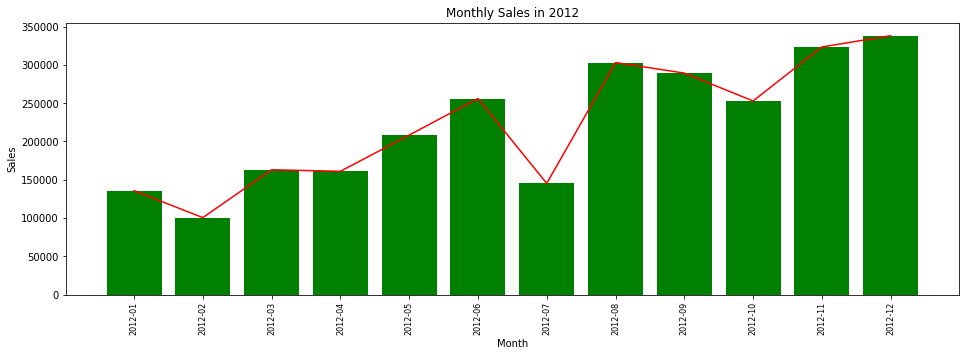

In [28]:
plt.figure(figsize=(16,5))
plt.plot(df_2012_monthly_sales['year_month'], df_2012_monthly_sales['sales'], color='red')
plt.bar(df_2012_monthly_sales['year_month'], df_2012_monthly_sales['sales'], color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales in 2012')
plt.show()

In [29]:
df_2013 = dataset.loc[dataset['year'] == 2013]
df_2013_monthly_sales = df_2013.groupby('year_month')['sales'].sum().reset_index()
df_2013_monthly_sales

,year_month,sales
0,2013-01,199185.90738
1,2013-02,167239.65040
2,2013-03,198594.03012
3,2013-04,177821.31684
4,2013-05,260498.56470
5,2013-06,396519.61190
6,2013-07,229928.95200
7,2013-08,326488.78936
8,2013-09,376619.24568
9,2013-10,293406.64288


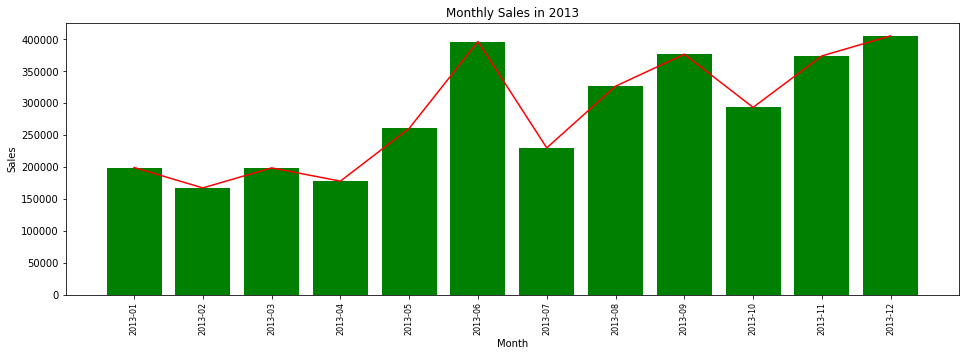

In [30]:
plt.figure(figsize=(16,5))
plt.plot(df_2013_monthly_sales['year_month'], df_2013_monthly_sales['sales'], color='red')
plt.bar(df_2013_monthly_sales['year_month'], df_2013_monthly_sales['sales'], color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales in 2013')
plt.show()

In [31]:
df_2014 = dataset.loc[dataset['year'] == 2014]
df_2014_monthly_sales = df_2014.groupby('year_month')['sales'].sum().reset_index()
df_2014_monthly_sales

,year_month,sales
0,2014-01,241268.55566
1,2014-02,184837.35556
2,2014-03,263100.77262
3,2014-04,242771.86130
4,2014-05,288401.04614
5,2014-06,401814.06310
6,2014-07,258705.68048
7,2014-08,456619.94236
8,2014-09,481157.24370
9,2014-10,422766.62916


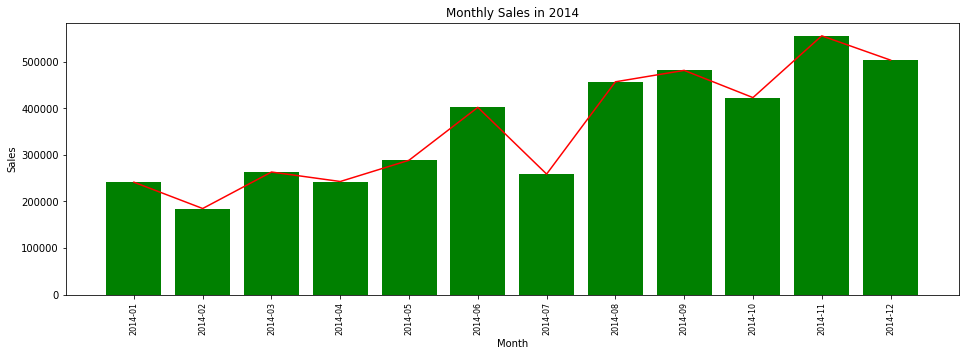

In [32]:
plt.figure(figsize=(16,5))
plt.plot(df_2014_monthly_sales['year_month'], df_2014_monthly_sales['sales'], color='red')
plt.bar(df_2014_monthly_sales['year_month'], df_2014_monthly_sales['sales'], color='green')
plt.xticks(rotation='vertical', size=8)
plt.xlabel("Month")
plt.ylabel('Sales')
plt.title('Monthly Sales in 2014')
plt.show()

In [33]:
sales_by_product = dataset.groupby('product_name')['sales'].sum().reset_index()
sales_by_product = sales_by_product.sort_values(by='sales', ascending=False)
top_10_sales_by_product = sales_by_product[:10]
top_10_sales_by_product

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


Text(0.5, 1.0, 'Top 10 Products With Most Sales')

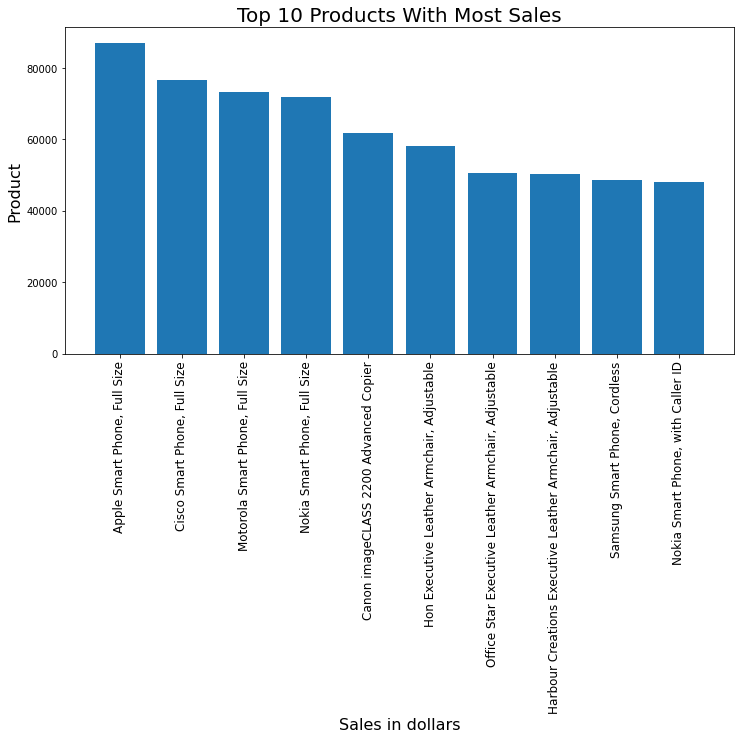

In [34]:
plt.figure(figsize=(12,6))
plt.bar(top_10_sales_by_product['product_name'], top_10_sales_by_product['sales'])
plt.xticks(rotation='vertical', size=12)
plt.xlabel('Sales in dollars', fontsize = 16)
plt.ylabel('Product', fontsize = 16)
plt.title('Top 10 Products With Most Sales', fontsize = 20)

In [35]:
profit_by_product = dataset.groupby('product_name')['profit'].sum().reset_index()
profit_by_product = profit_by_product.sort_values(by='profit', ascending=False)
top_10_profitable_products = profit_by_product[:10]
top_10_profitable_products

,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
2501,"Nokia Smart Phone, Full Size",9938.1955
971,"Cisco Smart Phone, with Caller ID",9786.6408
2502,"Nokia Smart Phone, with Caller ID",9465.3257
589,"Belkin Router, USB",8955.0180


Text(0.5, 1.0, 'Top 10 Profitable Products')

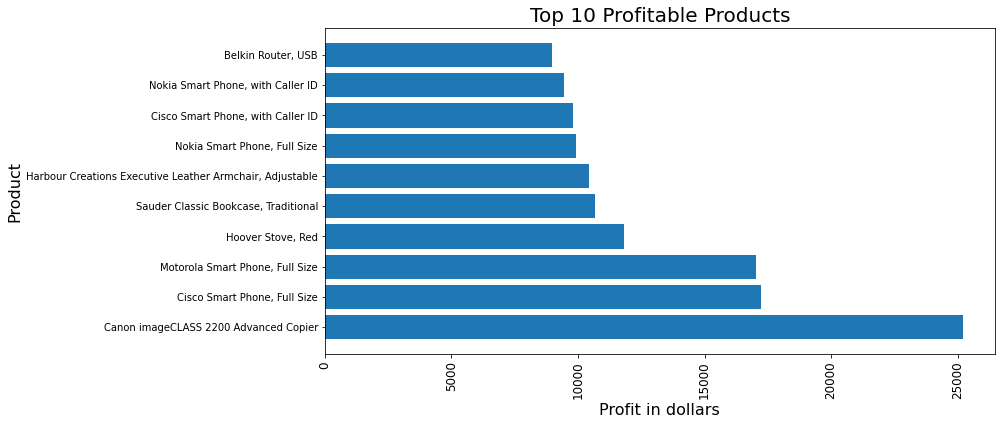

In [36]:
plt.figure(figsize=(12,6))
plt.barh(top_10_profitable_products['product_name'], top_10_profitable_products['profit'])
plt.xticks(rotation='vertical', size = 12)
plt.xlabel('Profit in dollars', fontsize = 16)
plt.ylabel('Product', fontsize = 16)
plt.title('Top 10 Profitable Products', fontsize = 20)

In [37]:
loss_by_product = dataset.groupby('product_name')['profit'].sum().reset_index()
loss_by_product = loss_by_product.sort_values(by='profit', ascending = True)
top_10_loss_products = loss_by_product.tail(10)
top_10_loss_products

,product_name,profit
589,"Belkin Router, USB",8955.0180
2502,"Nokia Smart Phone, with Caller ID",9465.3257
971,"Cisco Smart Phone, with Caller ID",9786.6408
2501,"Nokia Smart Phone, Full Size",9938.1955
1714,"Harbour Creations Executive Leather Armchair, ...",10427.3260
3098,"Sauder Classic Bookcase, Traditional",10672.0730
1926,"Hoover Stove, Red",11807.9690
2415,"Motorola Smart Phone, Full Size",17027.1130
970,"Cisco Smart Phone, Full Size",17238.5206
866,Canon imageCLASS 2200 Advanced Copier,25199.9280


Text(0.5, 1.0, 'Top 10 Loss Products')

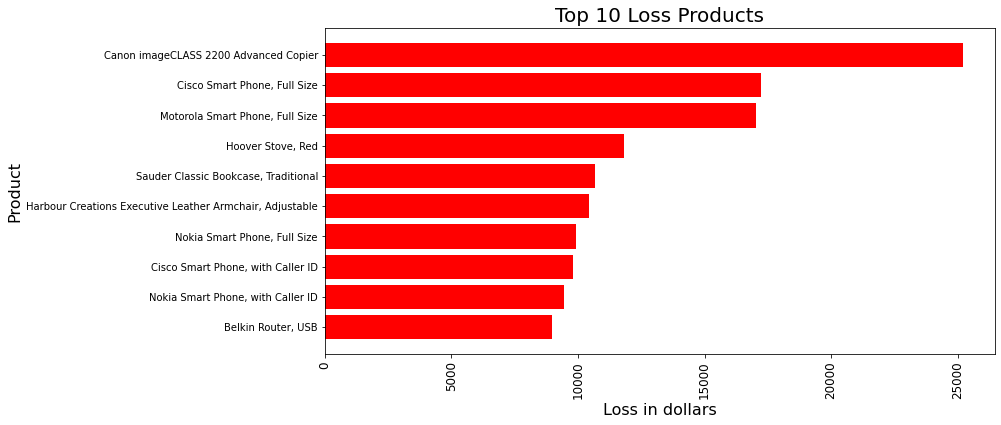

In [38]:
plt.figure(figsize=(12,6))
plt.barh(top_10_loss_products['product_name'], top_10_loss_products['profit'], color = 'red')
plt.xticks(rotation='vertical', size = 12)
plt.xlabel('Loss in dollars', fontsize = 16)
plt.ylabel('Product', fontsize = 16)
plt.title('Top 10 Loss Products', fontsize = 20)

In [39]:
quantity_by_product = dataset.groupby('product_name')['quantity'].sum().reset_index()
quantity_by_product = quantity_by_product.sort_values(by='quantity', ascending=False)
top_10_products_most_quantity_sold = quantity_by_product[:10]
top_10_products_most_quantity_sold

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


[]

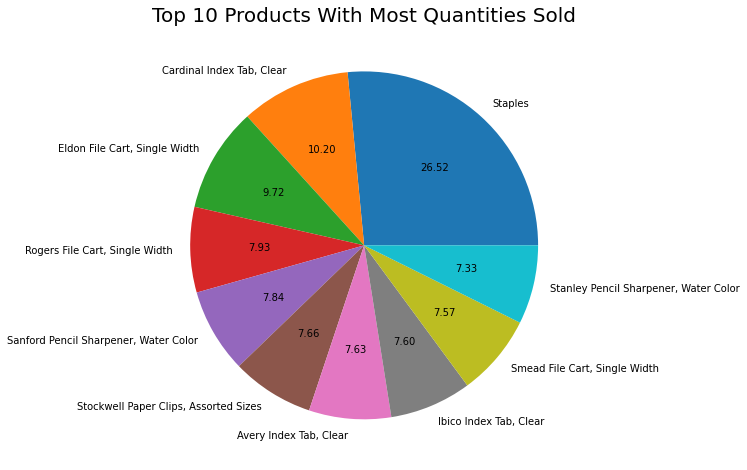

In [40]:
plt.figure(figsize = (12,8))
plt.pie(top_10_products_most_quantity_sold['quantity'], labels =  top_10_products_most_quantity_sold['product_name'], autopct = '%.2f')
plt.title("Top 10 Products With Most Quantities Sold", fontsize = 20)
plt.plot()